<a href="https://colab.research.google.com/github/JyLee98ImTrying/AA2/blob/main/LeeJieYeng_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data Ingestion: mount google drive and create a df from a csv file
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Recipe.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-15-be2b6e7efcba>:5: DtypeWarning: Columns (0,2,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/Recipe.csv')


In [ ]:
#Check for missing values and data types
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522568 entries, 0 to 522567
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   RecipeId                    522568 non-null  object
 1   Name                        522568 non-null  object
 2   AuthorId                    522568 non-null  object
 3   AuthorName                  522568 non-null  object
 4   CookTime                    440023 non-null  object
 5   PrepTime                    522568 non-null  object
 6   TotalTime                   522567 non-null  object
 7   DatePublished               522567 non-null  object
 8   Description                 522562 non-null  object
 9   Images                      522563 non-null  object
 10  RecipeCategory              521806 non-null  object
 11  Keywords                    505320 non-null  object
 12  RecipeIngredientQuantities  522554 non-null  object
 13  RecipeIngredientParts       5

In [ ]:
# Basic data cleaning
# 1. Drop duplicates
df = df.drop_duplicates()

# 2. Handle missing values
# For simplicity, we'll fill missing numerical values with the median and categorical values with the mode
df = df.fillna({
    col: df[col].median() if df[col].dtype in ['int64', 'float64'] else df[col].mode()[0]
    for col in df.columns
})

In [ ]:
#Feature Engineering for EDA

df_DR = df.drop(['RecipeId', 'AuthorId', 'CookTime', 'PrepTime', 'DatePublished', 'Description', 'Images', 'Keywords', 'ReviewCount', 'RecipeServings'], axis=1)




In [ ]:
df_DR.to_csv('df_DR.csv', index=False)

In [ ]:
#df

df_DR = pd.read_csv('/content/drive/My Drive/df_DR.csv')

<ipython-input-22-4482f6492d28>:3: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_DR = pd.read_csv('/content/drive/My Drive/df_DR.csv')


In [ ]:
print(df_DR.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522568 entries, 0 to 522567
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Name                        522568 non-null  object
 1   AuthorName                  522568 non-null  object
 2   TotalTime                   522568 non-null  object
 3   RecipeCategory              522568 non-null  object
 4   RecipeIngredientQuantities  522568 non-null  object
 5   RecipeIngredientParts       522568 non-null  object
 6   AggregatedRating            522568 non-null  object
 7   Calories                    522568 non-null  object
 8   FatContent                  522568 non-null  object
 9   SaturatedFatContent         522568 non-null  object
 10  CholesterolContent          522568 non-null  object
 11  SodiumContent               522568 non-null  object
 12  CarbohydrateContent         522568 non-null  object
 13  FiberContent                5

In [ ]:
from collections import Counter
import re
import ast

# Initialize an empty Counter object
ingredient_counter = Counter()

# Function to clean and extract ingredients
def extract_ingredients(ingredient_str):
    # Remove the 'c(' and ')' characters and split by commas
    ingredient_str = re.sub(r'c\(|\)', '', ingredient_str)
    # Split the string by commas to get individual ingredients
    ingredients = [ingredient.strip() for ingredient in ingredient_str.split(',')]
    return ingredients

# Iterate over each row in the 'RecipeIngredientParts' column
for ingredients in df['RecipeIngredientParts']:
    # Extract and clean ingredients
    ingredient_list = extract_ingredients(ingredients)

    # Update the counter with the ingredients in this row
    ingredient_counter.update(ingredient_list)

# Convert the counter object to a DataFrame for better readability
ingredient_frequency_df = pd.DataFrame(ingredient_counter.items(), columns=['Ingredient', 'Frequency'])

# Sort the DataFrame by frequency in descending order
ingredient_frequency_df = ingredient_frequency_df.sort_values(by='Frequency', ascending=False)

# Display the top 10 most frequent ingredients
print(ingredient_frequency_df.head(10))

         Ingredient  Frequency
20           "salt"     199780
53         "butter"     136079
29          "sugar"     115852
22          "onion"      87546
56          "water"      84376
28           "eggs"      81186
41      "olive oil"      76724
61          "flour"      62410
5            "milk"      61247
45  "garlic cloves"      59604


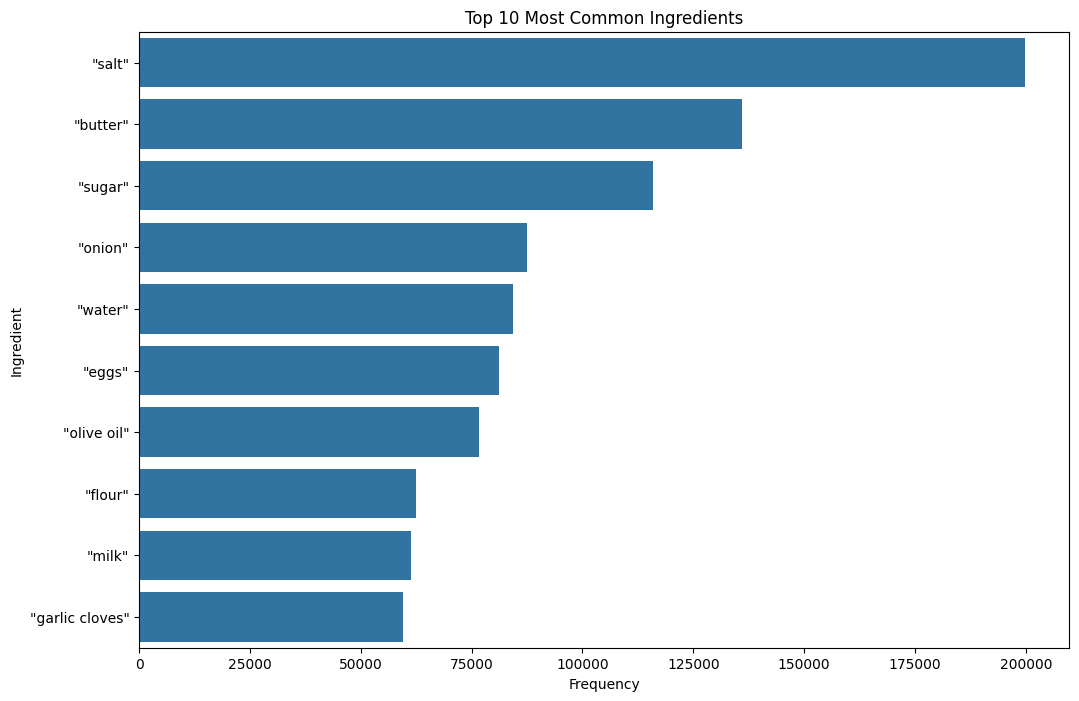

In [ ]:
#Top ingredients

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the top 10 most common ingredients
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Ingredient', data=ingredient_frequency_df.head(10))
plt.title('Top 10 Most Common Ingredients')
plt.xlabel('Frequency')
plt.ylabel('Ingredient')
plt.show()

In [ ]:
# Check the data type of the RecipeCategory column
print(df_EDA['RecipeCategory'].dtype)


# Convert to string if necessary
df_EDA['RecipeCategory'] = df_EDA['RecipeCategory'].astype(str)

object


<ipython-input-12-17b1c1a74328>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts, y=category_counts.values, palette='viridis')


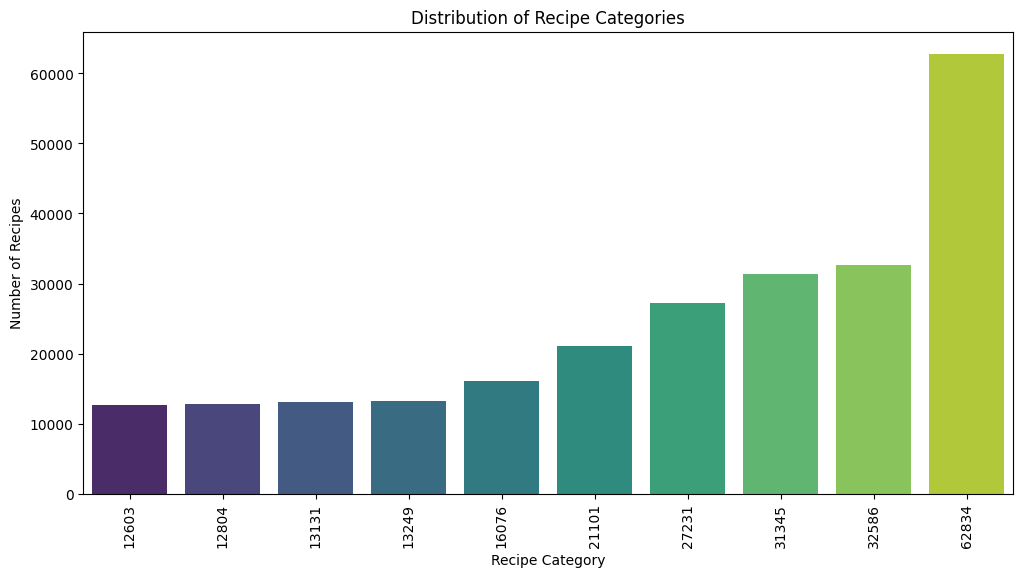

In [ ]:
#Distribution of Recipe Categories

# Count the number of recipes per category
category_counts = df_EDA['RecipeCategory'].value_counts().head(10)


# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts, y=category_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Recipe Categories')
plt.xlabel('Recipe Category')
plt.ylabel('Number of Recipes')
plt.show()


In [ ]:
# Selecting only the columns related to nutritional values
nutritional_columns = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
                       'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

# Correlation matrix
corr_matrix = df_EDA[nutritional_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Nutritional Values')
plt.show()

ValueError: could not convert string to float: 'q_95/v1/img/recipes/28/86/vYx7S5AmTtmK4ROM26lI_C8BC242E-5631-47D0-8AAE-1B8782061C6D.jpeg""'

In [ ]:
# Example of filling missing values
df['RecipeIngredientQuantities'] = df['RecipeIngredientQuantities'].fillna('0')
df['RecipeIngredientParts'] = df['RecipeIngredientParts'].fillna('unknown ingredient')

# Filling numerical features with 0
df['AggregatedRating'] = df['AggregatedRating'].fillna(0)
df['ReviewCount'] = df['ReviewCount'].fillna(0)

# Drop unnecessary columns
df = df.drop(columns=['Images', 'Description', 'AuthorName'])